### aim: Compare pco2 in the SO vs depth-integrated chl and ppt

### date: Dec 19, 2022 

In [122]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [123]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [124]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [125]:
# RW runs
lom = [
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G72/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G73/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G75/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G77/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G74/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G78/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G79/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G80/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G81/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G82/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G84/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G83/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G85/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G86/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G87/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G88/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G89/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G91/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G93/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G92/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G76/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G94/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G96/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G95/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G90/',
'/gpfs/home/hnb15vcu/scratch/ModelRuns/TOM12_RW_3G97/',
# '/gpfs/home/avd22gnu/scratch/ModelRuns/TOM12_PT_EX08/',
# '/gpfs/home/avd22gnu/scratch/ModelRuns/TOM12_PT_EX05/',
# '/gpfs/home/avd22gnu/scratch/ModelRuns/TOM12_PT_EX10/',
]

#PT runs
lom2 = \
['/gpfs/home/avd22gnu/scratch/ModelRuns/RIV12_PT_EX23/',
'/gpfs/home/avd22gnu/scratch/ModelRuns/RIV12_PT_ER09/',
'/gpfs/home/avd22gnu/scratch/ModelRuns/RIV12_PT_ER08/',
'/gpfs/home/avd22gnu/scratch/ModelRuns/RIV12_PT_ER11/',
'/gpfs/home/avd22gnu/scratch/ModelRuns/RIV12_PT_ER12/',
'/gpfs/home/avd22gnu/scratch/ModelRuns/RIV12_PT_ER10/',
'/gpfs/home/avd22gnu/scratch/ModelRuns/RIV12_PT_EX47/',
'/gpfs/home/avd22gnu/scratch/ModelRuns/RIV12_PT_ER13/']

#JG runs
lom3 = [\
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_CA10/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_OCE8/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_FOIS/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_PEAK/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_O8I5/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_PEAX/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_O7I5/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_O8S8/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_O9S8/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_O9I5/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_OCE9/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_EB20/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_OCI5/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/TOM12_JG_EB21/',
'/gpfs/scratch/vsz14eru/models/ModelRuns/TOM12_JG_OCCA/']


lom4 = [\
        '/gpfs/data/greenocean/software/runs/TOM12_DW_WE43/',
        '/gpfs/data/greenocean/software/runs/TOM12_DW_GA01/',
        '/gpfs/data/greenocean/software/runs/TOM12_TJ_1ASA/',]

In [126]:
print(len(lom))

26


In [127]:
w2 = xr.open_dataset('//gpfs/data/greenocean/software/runs/TOM12_TJ_1ASA/ORCA2_1m_19900101_19901231_ptrc_T.nc')

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmask = tmesh['tmaskutil'][0,:,:] 

tmesh = xr.open_dataset('/gpfs/data/greenocean/software/resources/regrid/mesh_mask3_6.nc')
tmesh['csize'] = tmesh.tmask[0,0,:,:] * tmesh.e1t[0,:,:] * tmesh.e2t[0,:,:]

csize_broad = np.zeros([31,149,182])
for i in range(0,31):
    csize_broad[i,:,:] = tmesh['csize'].values
cvol = csize_broad * tmesh['e3t_0'][0,:,:,:] * tmesh['tmask'][0,:,:,:]



In [128]:
def make_yearlist(yrst, yrend, dtype, baseDir):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        ty = f'{baseDir}//ORCA2_1m_{yrs[i]}*{dtype}*.nc'
        t2 = glob.glob(ty)
        #print(t2)
        ylist.append(t2[0])
    return ylist



In [129]:
def plot_stats(tlom, tcm, yrst, yrend, dtype, seg, p1, p2, tmark, st_rep):
    for i in range(0,len(tlom)):
        try:
            baseDir = tlom[i]
            ylist = make_yearlist(yrst, yrend, dtype, baseDir)
            w = xr.open_mfdataset(ylist)
            tnam = baseDir.replace(st_rep,'')
            q = w.pCO2.groupby('time_counter.season').mean('time_counter').values
            pCO2_DJF_mean = np.ma.average(q[0,0:37,:], weights = tmesh['csize'][0:37,:].values)
            pCO2_JJA_mean = np.ma.average(q[2,0:37,:], weights = tmesh['csize'][0:37,:].values)

            q = w.PPINT.groupby('time_counter.season').mean('time_counter').values
            PPINT_DJF_mean = np.ma.average(q[0,0:37,:], weights = tmesh['csize'][0:37,:].values)
            PPINT_JJA_mean = np.ma.average(q[2,0:37,:], weights = tmesh['csize'][0:37,:].values)

            q = w.TChl.groupby('time_counter.season').mean('time_counter').values
            TChl_DJF_mean = np.ma.average(q[0,0,0:37,:], weights = tmesh['csize'][0:37,:].values)
            TChl_JJA_mean = np.ma.average(q[2,0,0:37,:], weights = tmesh['csize'][0:37,:].values)


            axs[p1].plot(PPINT_DJF_mean, (pCO2_JJA_mean-pCO2_DJF_mean), marker = tmark, linestyle = '',\
                        label = tnam, markersize = ms, color = tcm(1.*(i)/seg))
            axs[p1].plot(PPINT_JJA_mean, pCO2_JJA_mean-pCO2_DJF_mean, marker = tmark, markersize = ms-f,  color = tcm(1.*(i)/seg), alpha = 0.5)
            axs[p2].plot(TChl_DJF_mean, pCO2_JJA_mean-pCO2_DJF_mean, label = tnam, linestyle = '', marker = tmark, markersize = ms,  color = tcm(1.*(i)/seg))
            axs[p2].plot(TChl_JJA_mean, pCO2_JJA_mean-pCO2_DJF_mean, marker = tmark, markersize = ms-f,  color = tcm(1.*(i)/seg), alpha = 0.5)
            axs[p2].legend(bbox_to_anchor = [1, 1], ncol = 2, fontsize = 10)

            axs[6].plot(PPINT_DJF_mean, (pCO2_JJA_mean-pCO2_DJF_mean), marker = tmark, linestyle = '',\
                        label = tnam, markersize = ms, color = tcm(1.*(i)/seg))
            axs[7].plot(TChl_DJF_mean, pCO2_JJA_mean-pCO2_DJF_mean, label = tnam, linestyle = '', marker = tmark, markersize = ms,  color = tcm(1.*(i)/seg))    
        except:
            print(baseDir)

## Summary:

- We compare the winter-summer (JJA-DJF) difference in surface pCO2 to two different indicators of biological activity.
- Surface TChl may give an indication of conditions on the surface (not a rate measurement)
- depth-integrated PPT gives an indication of overall productivity (rate measurement)
- (in the real world, this winter-summer difference should be positive because of a combination of upwelling and seasonality of biological activity: 
	- {Mongwe2018 has ~(380[JJA]-343[DJF] = +37 µatm)}
- in all of our models, it is backwards, however improvement in seasonality fairly clearly scales (near-linearly?) with both chosen indicators (seen most clearly in RW runs)
- the PT runs have clear and large jumps in pCO2 seasonality *without changes in biological indicators* - not sure why without knowing the models. 
- JG’s tuning has a modest impact on bio. indicators, almost none on pCO2 seasonality
- the benchmark runs do comparatively well. in pco2 performance GA01 fits between the two CORE-forcing runs (WE43 (ERA5) and 1ASA(UKESM1), despite having way lower productivity.

- TA-DIC scales very well with pco2 seasonality performance.


technical notes:
- area-averaged seasonal means (xarray), south of -50


/gpfs/scratch/vsz14eru/models/ModelRuns/RIV12_JG_OCE8/


NameError: name 'q' is not defined

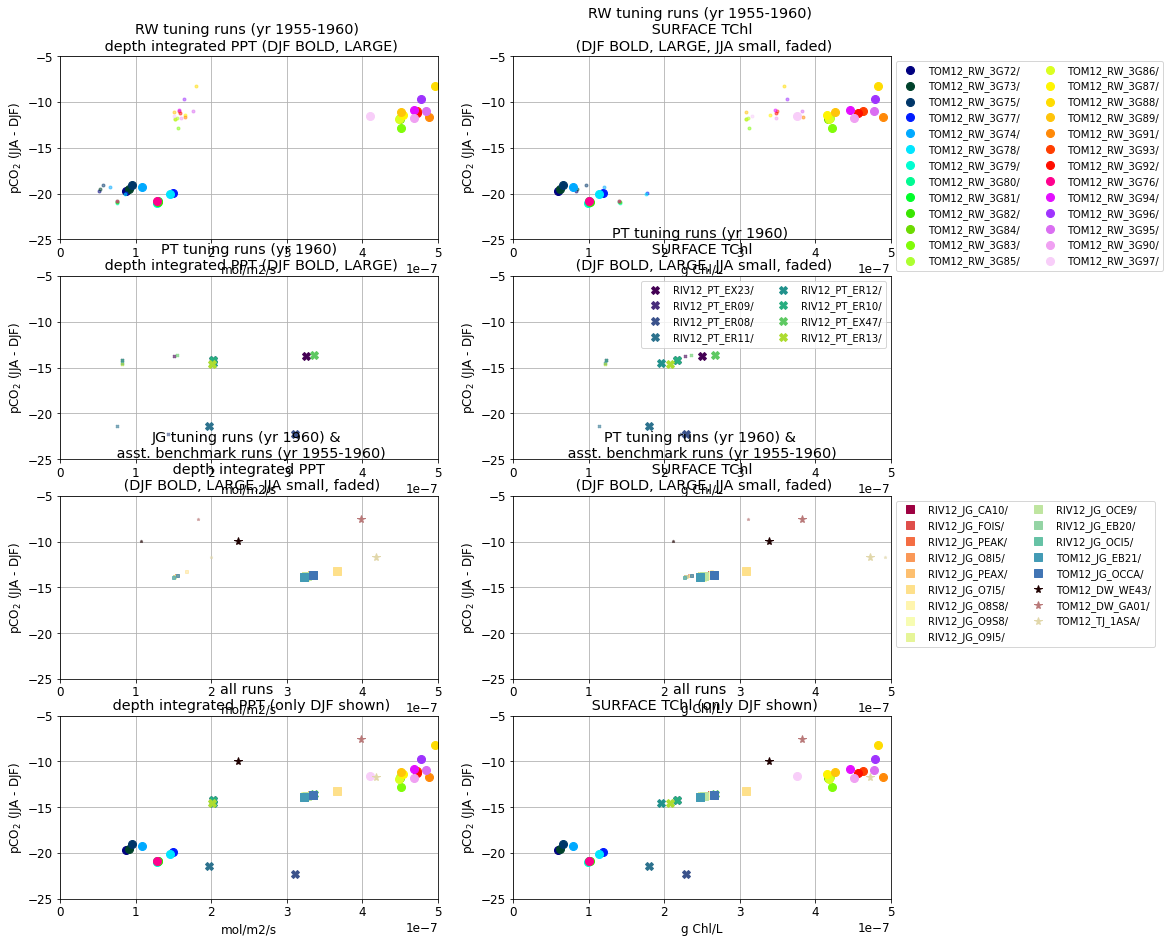

In [130]:
import matplotlib

ms = 8; f = 5

fact = 3.1
fig, axs = plt.subplots(4,2, figsize=(4.8*fact, 5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tcm = matplotlib.cm.get_cmap('gist_ncar')
yrst = 1955; yrend = 1960; dtype = 'diad_T'
seg = len(lom)
p1 = 0; p2 = 1; tmark = 'o'
st_rep = '/gpfs/home/hnb15vcu/scratch/ModelRuns/'
plot_stats(lom, tcm, yrst, yrend, dtype, seg, p1, p2, tmark, st_rep)

tcm = matplotlib.cm.get_cmap('viridis')
yrst = 1960; yrend = 1960; dtype = 'diad_T'
seg = len(lom2)
p1 = 2; p2 = 3; tmark = 'X'
st_rep = '/gpfs/home/avd22gnu/scratch/ModelRuns/'
plot_stats(lom2, tcm, yrst, yrend, dtype, seg, p1, p2, tmark, st_rep)
        
tcm = matplotlib.cm.get_cmap('Spectral')
yrst = 1960; yrend = 1960; dtype = 'diad_T'
seg = len(lom3)
p1 = 4; p2 = 5; tmark = 's'
st_rep = '/gpfs/scratch/vsz14eru/models/ModelRuns/'
plot_stats(lom3, tcm, yrst, yrend, dtype, seg, p1, p2, tmark, st_rep) 
    
    
tcm = matplotlib.cm.get_cmap('pink')
yrst = 1955; yrend = 1960; dtype = 'diad_T'
seg = len(lom4)
p1 = 4; p2 = 5; tmark = '*'
st_rep = '/gpfs/data/greenocean/software/runs/'
plot_stats(lom4, tcm, yrst, yrend, dtype, seg, p1, p2, tmark, st_rep) 

for i in range(0,8):
    axs[0].set_title('RW tuning runs (yr 1955-1960) \n depth integrated PPT (DJF BOLD, LARGE)')
    axs[1].set_title('RW tuning runs (yr 1955-1960) \n SURFACE TChl \n (DJF BOLD, LARGE, JJA small, faded)')
    axs[0].set_xlabel('mol/m2/s') 
    axs[1].set_xlabel('g Chl/L')
    
    axs[2].set_title('PT tuning runs (yr 1960)\n depth integrated PPT (DJF BOLD, LARGE)')
    axs[3].set_title('PT tuning runs (yr 1960) \n SURFACE TChl \n (DJF BOLD, LARGE, JJA small, faded)')
    axs[2].set_xlabel('mol/m2/s') 
    axs[3].set_xlabel('g Chl/L')
    
    axs[4].set_title('JG tuning runs (yr 1960) & \n asst. benchmark runs (yr 1955-1960)\n depth integrated PPT \n (DJF BOLD, LARGE, JJA small, faded)')
    axs[5].set_title('PT tuning runs (yr 1960) & \n asst. benchmark runs (yr 1955-1960) \n SURFACE TChl \n (DJF BOLD, LARGE, JJA small, faded)')
    axs[4].set_xlabel('mol/m2/s') 
    axs[5].set_xlabel('g Chl/L')
    
    axs[6].set_title('all runs \n depth integrated PPT (only DJF shown)')
    axs[7].set_title('all runs \n SURFACE TChl (only DJF shown)')
    axs[6].set_xlabel('mol/m2/s') 
    axs[7].set_xlabel('g Chl/L')
    
    axs[i].grid()
    axs[i].set_xlim([0,5e-7])
    axs[i].set_ylim([-25,-5])
    axs[i].set_ylabel('pCO$_2$ (JJA - DJF)')
print(np.shape(q))

plt.tight_layout()


In [ ]:
print('compute-complete')

In [ ]:
def plot_stats_tadic(tlom, tcm, yrst, yrend, dtype, seg, p1, p2, tmark, st_rep):
    print('update')
    for i in range(0,len(tlom)):
        try:
            baseDir = tlom[i]
            dtype = 'diad_T'
            ylist = make_yearlist(yrst, yrend, dtype, baseDir)
            w = xr.open_mfdataset(ylist)
            tnam = baseDir.replace(st_rep,'')
            q = w.pCO2.groupby('time_counter.season').mean('time_counter').values
            pCO2_DJF_mean = np.ma.average(q[0,0:37,:], weights = tmesh['csize'][0:37,:].values)
            pCO2_JJA_mean = np.ma.average(q[2,0:37,:], weights = tmesh['csize'][0:37,:].values)

            q = w.PPINT.groupby('time_counter.season').mean('time_counter').values
            PPINT_DJF_mean = np.ma.average(q[0,0:37,:], weights = tmesh['csize'][0:37,:].values)
            PPINT_JJA_mean = np.ma.average(q[2,0:37,:], weights = tmesh['csize'][0:37,:].values)

            q = w.TChl.groupby('time_counter.season').mean('time_counter').values
            TChl_DJF_mean = np.ma.average(q[0,0,0:37,:], weights = tmesh['csize'][0:37,:].values)
            TChl_JJA_mean = np.ma.average(q[2,0,0:37,:], weights = tmesh['csize'][0:37,:].values)
            
            dtype = 'ptrc_T'
            ylist = make_yearlist(yrst, yrend, dtype, baseDir)
            w = xr.open_mfdataset(ylist)
            #print(w)
            tnam = baseDir.replace(st_rep,'')
            DIC = w.DIC.groupby('time_counter.season').mean('time_counter').values
            TA = w.Alkalini.groupby('time_counter.season').mean('time_counter').values
            q = TA-DIC
            TADIC_DJF_mean = np.ma.average(q[0,0,0:37,:], weights = tmesh['csize'][0:37,:].values) * 1e6
            TADIC_JJA_mean = np.ma.average(q[2,0,0:37,:], weights = tmesh['csize'][0:37,:].values) * 1e6


            axs[p1].plot(PPINT_DJF_mean, (pCO2_JJA_mean-pCO2_DJF_mean), marker = tmark, linestyle = '',\
                        label = tnam, markersize = ms, color = tcm(1.*(i)/seg))
            axs[p1].plot(PPINT_JJA_mean, pCO2_JJA_mean-pCO2_DJF_mean, marker = tmark, markersize = ms-f,  color = tcm(1.*(i)/seg), alpha = 0.5)

            axs[p2].plot(TChl_DJF_mean, pCO2_JJA_mean-pCO2_DJF_mean, label = tnam, linestyle = '', marker = tmark, markersize = ms,  color = tcm(1.*(i)/seg))
            axs[p2].plot(TChl_JJA_mean, pCO2_JJA_mean-pCO2_DJF_mean, marker = tmark, markersize = ms-f,  color = tcm(1.*(i)/seg), alpha = 0.5)

            axs[p3].plot(TADIC_DJF_mean, pCO2_JJA_mean-pCO2_DJF_mean, label = tnam, linestyle = '', marker = tmark, markersize = ms,  color = tcm(1.*(i)/seg))
            axs[p3].plot(TADIC_JJA_mean, pCO2_JJA_mean-pCO2_DJF_mean, marker = tmark, markersize = ms-f,  color = tcm(1.*(i)/seg), alpha = 0.5)
            axs[p3].legend(bbox_to_anchor = [1, 1], ncol = 2, fontsize = 10)
            
            
            axs[9].plot(PPINT_DJF_mean, (pCO2_JJA_mean-pCO2_DJF_mean), marker = tmark, linestyle = '',\
                        label = tnam, markersize = ms, color = tcm(1.*(i)/seg))
            axs[10].plot(TChl_DJF_mean, pCO2_JJA_mean-pCO2_DJF_mean, label = tnam, linestyle = '', marker = tmark, markersize = ms,  color = tcm(1.*(i)/seg))
            axs[11].plot(TADIC_DJF_mean-TADIC_JJA_mean, pCO2_JJA_mean-pCO2_DJF_mean, label = tnam, linestyle = '', marker = tmark, markersize = ms,  color = tcm(1.*(i)/seg))
 
        except:
            print(baseDir)
            


## duplicate plot with summer-winter TA-DIC plots added

In [ ]:
ms = 8; f = 5

fact = 3.1
fig, axs = plt.subplots(4,3, figsize=(5.5*fact, 5*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

tcm = matplotlib.cm.get_cmap('gist_ncar')
yrst = 1955; yrend = 1960; dtype = 'diad_T'
seg = len(lom)
tmark = 'o'
shift = 0
p1 = 0+shift; p2 = 1+shift; p3 = 2+shift 
st_rep = '/gpfs/home/hnb15vcu/scratch/ModelRuns/'
plot_stats_tadic(lom, tcm, yrst, yrend, dtype, seg, p1, p2, tmark, st_rep)

tcm = matplotlib.cm.get_cmap('viridis')
yrst = 1960; yrend = 1960; dtype = 'diad_T'
seg = len(lom2)
tmark = 'X'
shift = 3
p1 = 0+shift; p2 = 1+shift; p3 = 2+shift 
st_rep = '/gpfs/home/avd22gnu/scratch/ModelRuns/'
plot_stats_tadic(lom2, tcm, yrst, yrend, dtype, seg, p1, p2, tmark, st_rep)
        
tcm = matplotlib.cm.get_cmap('Spectral')
yrst = 1960; yrend = 1960; dtype = 'diad_T'
seg = len(lom3)
tmark = 's'
shift = 6
p1 = 0+shift; p2 = 1+shift; p3 = 2+shift 
st_rep = '/gpfs/scratch/vsz14eru/models/ModelRuns/'
plot_stats_tadic(lom3, tcm, yrst, yrend, dtype, seg, p1, p2, tmark, st_rep) 
    
    
tcm = matplotlib.cm.get_cmap('pink')
yrst = 1955; yrend = 1960; dtype = 'diad_T'
seg = len(lom4)
tmark = '*'
p1 = 0+shift; p2 = 1+shift; p3 = 2+shift 
st_rep = '/gpfs/data/greenocean/software/runs/'
plot_stats_tadic(lom4, tcm, yrst, yrend, dtype, seg, p1, p2, tmark, st_rep) 


for i in range(0,12):
    axs[0+shift].set_title('RW tuning runs (yr 1955-1960) \n depth integrated PPT \n (DJF BOLD, LARGE)')
    axs[1+shift].set_title('RW tuning runs (yr 1955-1960) \n SURFACE TChl \n (DJF BOLD, LARGE, JJA small, faded)')
    axs[2+shift].set_title('RW tuning runs (yr 1955-1960) \n SURFACE TA-DIC \n (DJF BOLD, LARGE, JJA small, faded)')
    axs[0+shift].set_xlabel('mol/m2/s') 
    axs[1+shift].set_xlabel('g Chl/L')
    axs[2+shift].set_xlabel('µmol/ L')
    axs[0+shift].set_xlim([0,5e-7])
    axs[1+shift].set_xlim([0,5e-7])
    axs[2+shift].set_xlim([155,180])
    
    shift = 3
    axs[0+shift].set_title('PT tuning runs (yr 1960) \n depth integrated PPT \n (DJF BOLD, LARGE)')
    axs[1+shift].set_title('PT tuning runs (yr 1960) \n SURFACE TChl \n (DJF BOLD, LARGE, JJA small, faded)')
    axs[2+shift].set_title('PT tuning runs (yr 1960) \n SURFACE TA-DIC \n (DJF BOLD, LARGE, JJA small, faded)')
    axs[0+shift].set_xlabel('mol/m2/s') 
    axs[1+shift].set_xlabel('g Chl/L')
    axs[2+shift].set_xlabel('µmol/ L')
    axs[0+shift].set_xlim([0,5e-7])
    axs[1+shift].set_xlim([0,5e-7])
    axs[2+shift].set_xlim([155,180])
    
    shift = 6
    axs[0+shift].set_title('JG tuning runs (yr 1960) & \n asst. benchmark runs (yr 1955-1960) \n depth integrated PPT \n (DJF BOLD, LARGE)')
    axs[1+shift].set_title('JG tuning runs (yr 1960) & \n asst. benchmark runs (yr 1955-1960) \n SURFACE TChl \n (DJF BOLD, LARGE, JJA small, faded)')
    axs[2+shift].set_title('JG tuning runs (yr 1960)& \n asst. benchmark runs (yr 1955-1960) \n SURFACE TA-DIC \n (DJF BOLD, LARGE, JJA small, faded)')
    axs[0+shift].set_xlabel('mol/m2/s') 
    axs[1+shift].set_xlabel('g Chl/L')
    axs[2+shift].set_xlabel('µmol/ L')
    axs[0+shift].set_xlim([0,5e-7])
    axs[1+shift].set_xlim([0,5e-7])
    axs[2+shift].set_xlim([155,180])
    
    axs[9].set_title('all runs \n depth integrated PPT \n (only DJF shown)')
    axs[10].set_title('all runs \n SURFACE TChl (only DJF shown)')
    axs[11].set_title('all runs \n TA-DIC (DJF-JJA shown)')
    axs[9].set_xlabel('mol/m2/s') 
    axs[10].set_xlabel('g Chl/L')
    axs[11].set_xlabel('µmol/ L')
    
    axs[i].grid()
    axs[i].set_ylim([-25,-5])
    axs[i].set_ylabel('pCO$_2$ (JJA - DJF)')
print(np.shape(q))

plt.tight_layout()
